In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
A = pd.read_parquet("video-eval-preds-probs.parquet")
A.frame = A.frame.astype(int)
A = A.reset_index(drop = True)
B = pd.read_parquet("video-eval-summary-stats.parquet")

In [37]:
AA = A.groupby(["frame","class","video"])["prob"].apply(max).reset_index()

In [105]:
BB = []
for c in B.columns[2:10]:
    CC = B[["video", "frame", c]].reset_index(drop=True)
    CC.columns = ["video","frame","label"]
    CC["class"] = c
    BB.append(CC)
BB = pd.concat(BB)

In [122]:
df = AA.merge(BB,left_on = ["video","frame","class"],right_on=["video","frame","class"])
df["prob_round"] = np.round( df.prob/5,2 )*5

0
1
2
3
4
5
6
7


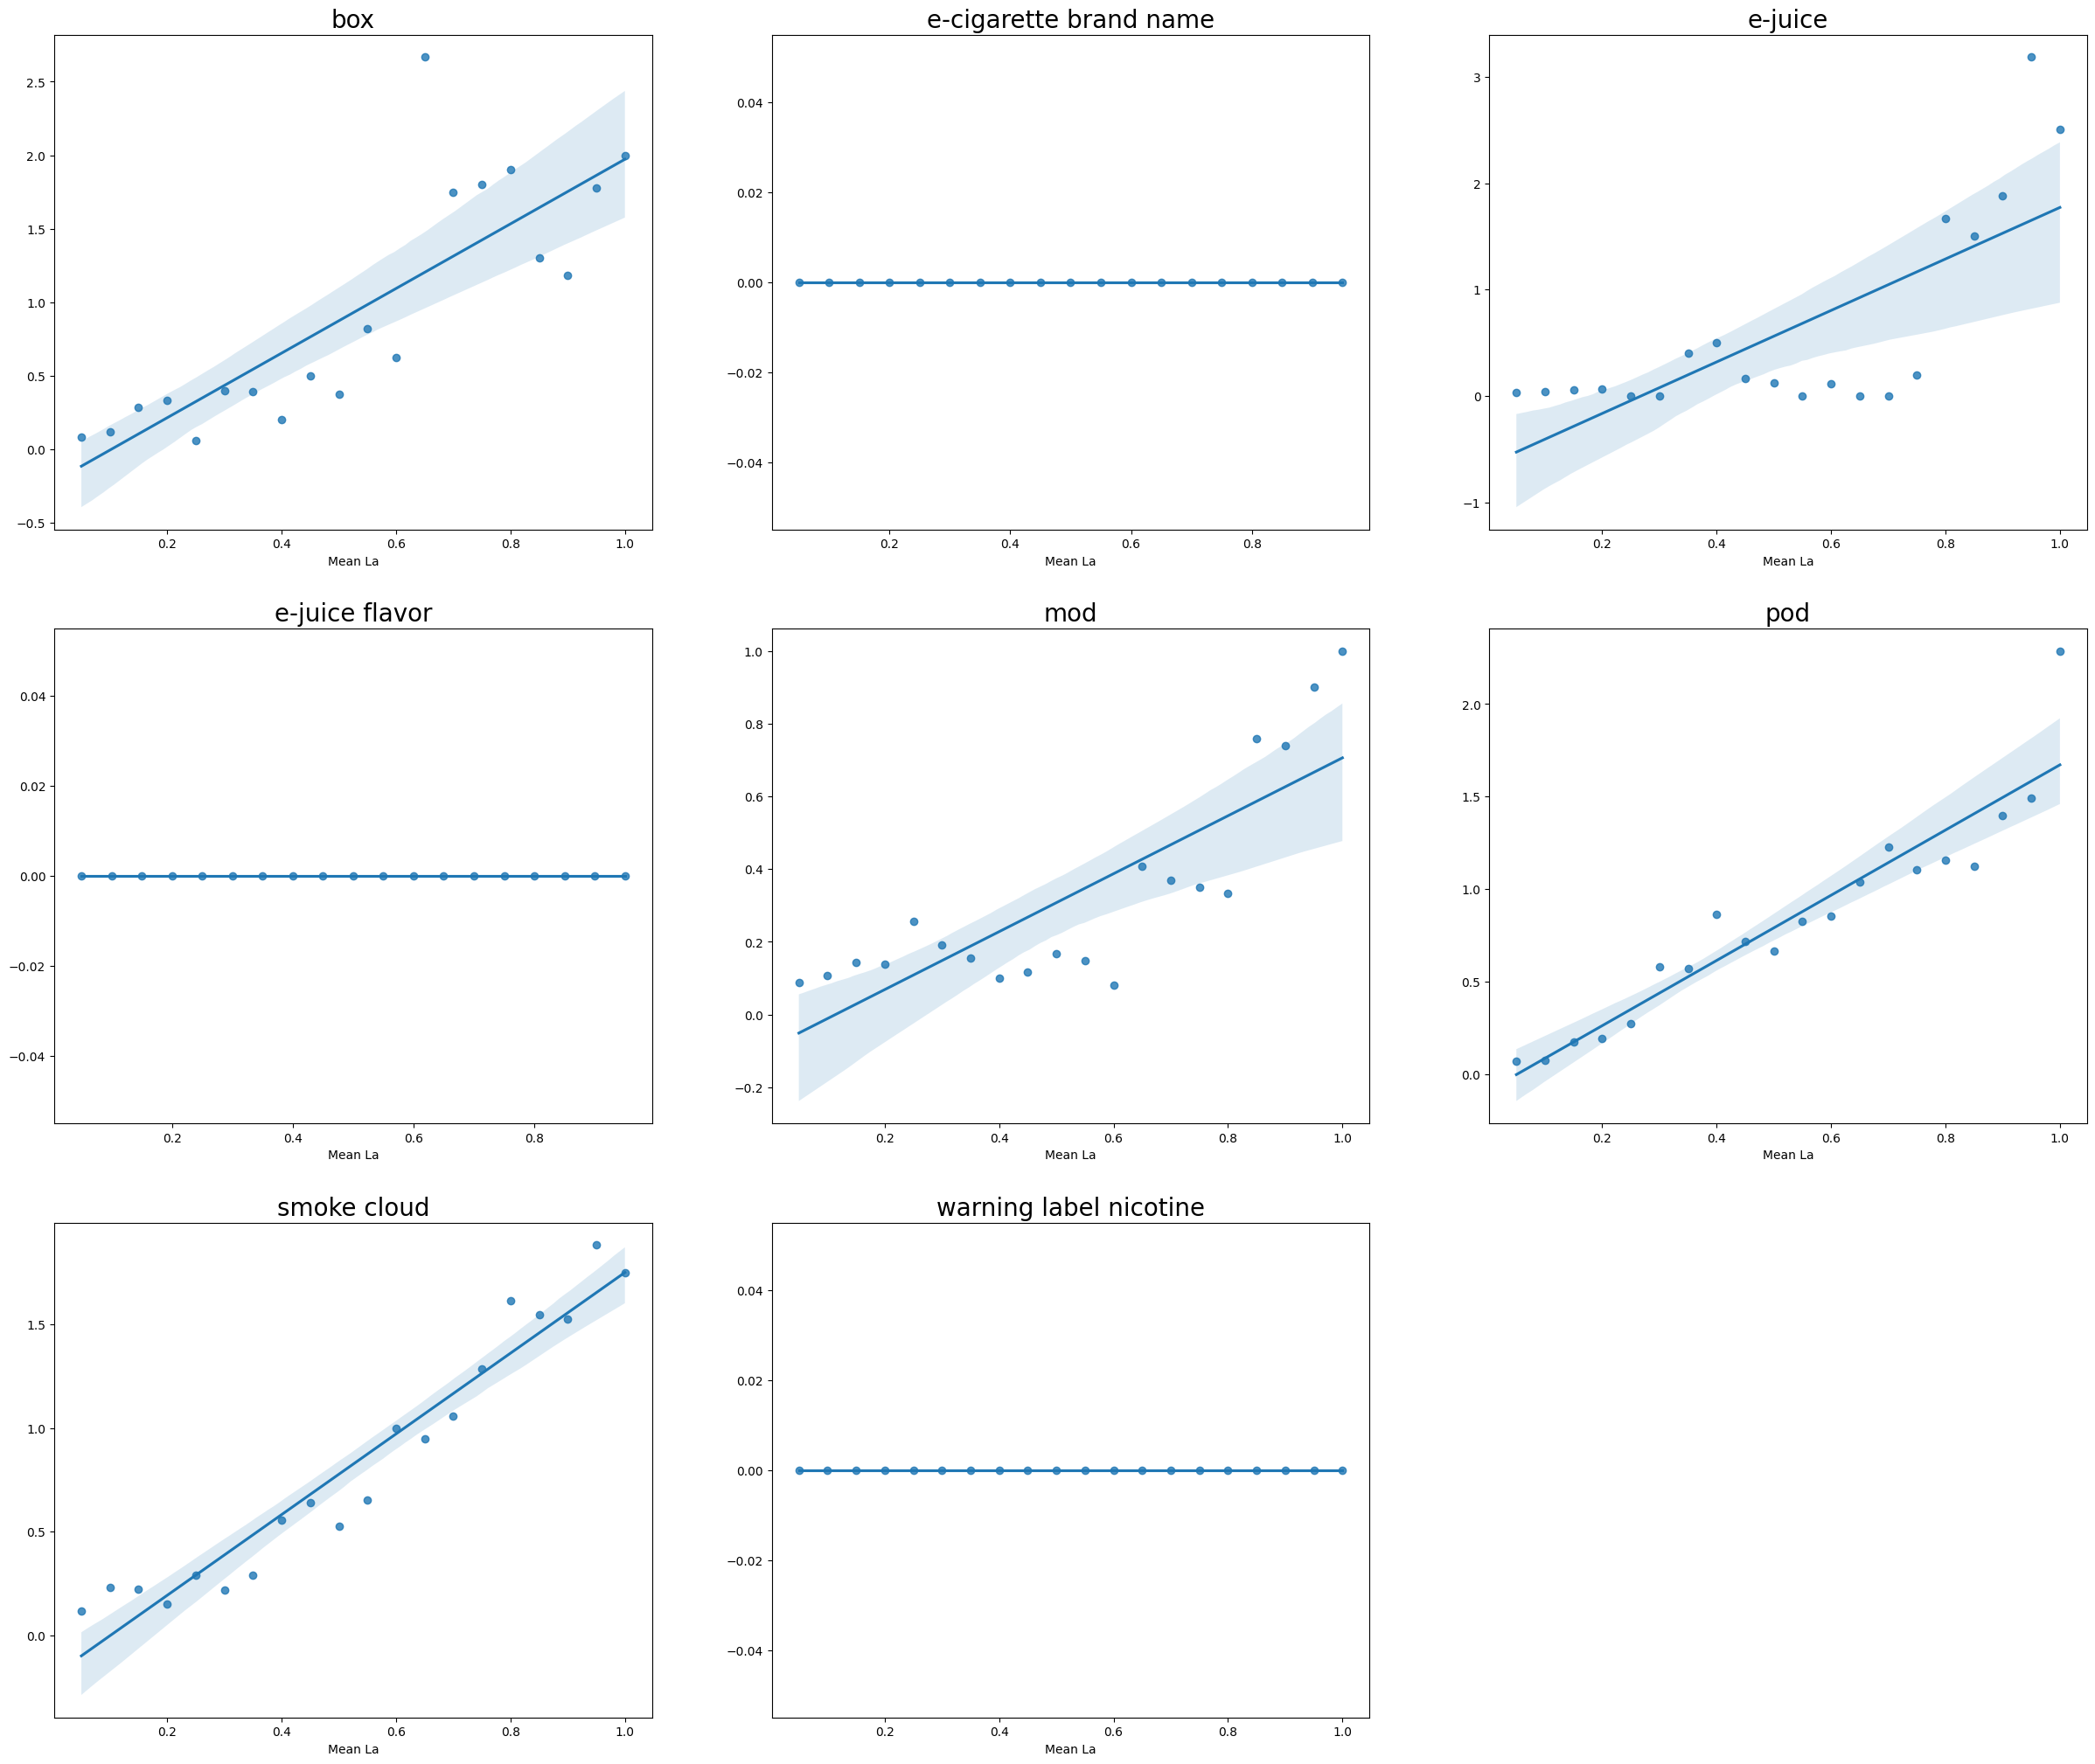

In [123]:
plt.figure(figsize=(30,25))
for i,u in enumerate(df["class"].unique()):
    print(i)
    plt.subplot(3,3,i+1)
    df2 = df[df["class"] == u]
    x = df2.groupby("prob_round")["label"].mean()
    x,y = x.index, x.values
    
    sns.regplot(x=x, y=y, )
    plt.xlabel("Classifier Probability")
    plt.xlabel("Mean La")
    
    plt.title(u,fontsize=20)

In [118]:
for i,u in enumerate(df["class"].unique()):
    df2 = df[df["class"] == u]
    print(u,df2.shape)

box (579, 6)
e-cigarette brand name (1119, 6)
e-juice (863, 6)
e-juice flavor (946, 6)
mod (1179, 6)
pod (1199, 6)
smoke cloud (1387, 6)
warning label nicotine (646, 6)
